### Name: Alok Thottakathu Prasannakumar
### zID : z5464669

# PART I

Part 1 Question 1

In [1]:
# Part 1 Question 1 code
import pandas as pd
import os

directory = 'dataset'  # dataset folder

# initialize empty list to store DataFrames
df_list = []
concatenated_input_df=[]

# Iterate over all the files in the dataset folder and append to data frame
for filename in os.listdir(directory):
    if filename.endswith('.tsv'):
        file_path = os.path.join(directory, filename)
        # Read the .tsv file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
        # Append the DataFrame to the list
        df_list.append(df)

# Combine all Dataframes to single dataframe of 2500 movies
movies_df = pd.concat(df_list, ignore_index=True)

# Drop duplicates and missing values
movies_df = movies_df.drop_duplicates()


Part 1 Question 1(i) 
###### Pandas doesnt take the top row i.e the headers i.e. "Title", "Plot" as data. So, no need to worry about that.
###### The columns of the data set are "Title","Release Year", "Genre", "Director", "Cast", "Plot", "Origin/Ethnicity"
###### Change to lowercase everything so that it will match with a lowercase converted user.tsv also.
###### Remove punctuation e.g. 'Monster, Inc.' and brackets i.e. '(' and ')' in the whole dataset first, because of cases like '(Mel Gibson)'.
###### Another e.g. '"Monster"', '"snuff film"'
###### Remove punctuation before stop words and stemming.
###### Remove all unnecessary characters like trademark symbol etc from whole dataset. i.e. there are weird symbols Ã and © etc.. i want such weird characters to be removed in preprocessing by regex presumably.
###### These punctuations and weird characters are essentially noise.
###### Hence, after weird symbols removal, the only characters that remain must be either letters or digits.
###### However, I checked the output that comes. Even digits wont be that useful. So, all DIGITS or numbers must be removed.
**REPLACING ANY PUNCTUATION SYMBOL MUST BE REPLACED BY 1 whitespace & not null string.
e.g. 'Monster,Inc.' should be outputed as 'Monster Inc' and not 'MonsterInc' .. because Monster is a good token and we should not loose it.**
###### Remove any field in "Cast" column and "Director" column with word ie. value "Unknown" or "unknown".
###### NO need to drop Rows with Null fields or "Unknown" word, because rest of the columns or fields contain enough data to help us classify the genre of the movie if necessary.
###### This is because we are concatenating all the columns, which I will mention shortly, and hence all rows will have atleast some data and not NULL.
###### Just an observation, no other fields other than Cast and Director in some places hae Null values i.e. empty fields.
**We must use LEMMATIZATION and not STEMMING as many words loose its noun form when we do STEMMING, such that I have seen useful information being lost when I use stemming on this dataset**
###### Also, lemmatization converting verb forms is not an issue as most of the user profile values will be nouns.
###### WE can and must stem the values in the column "plot", because only nouns in user1.tsv and user2.tsv. So, it shouldn't affect.
###### But, only do stemming in "Plot" column only and none of the other fields.
###### As per question, I am supposed to concatenate all these columns into 1 column.
###### There are a lot of observations I made as to which columns are important.
###### "Cast" is important because words like "Carrey" in user.tsv
###### "Genre" is important because of words in profile like "animation"
###### Title column is important because of words like "Christmas"
###### Director column is important because names like "Nolan". Also, "Carell" can be director, but not act in the movie i.e. not be a part of cast.
###### Ethnicity/Origin column is important e.g. "Bollywood"
###### However, in my personal opinion, Release Year is not important.
###### So, I keep all columns except Release Year.
###### Also, Genre is O/p class
###### So, the concatenated I/p document or movie will be Title + Director + Cast + Plot + Origin/Ethnicity
###### Regarding stopwords, the best thing I learned from tutorial is to combine both NLTK and scikit-learn stop words:-
###### NLTK has lesser words and scikit-learn has more words
###### combined_stop_words = stop_words_nltk.union(stop_words_sklearn)
###### print(combined_stop_words)
<br />

**As per the specifications above, i will use the following regex in the next question:-**

**r'[^\w\s]|[\d+]|[^a-zA-Z0-9\s]'**
<br />
<br />
  

**r'[^\w\s]', ' ': Replaces punctuation with a space.**

**[\d+], ' ': Removes digits by replacing with space.**

**[^a-zA-Z0-9\s]: Removes any weird characters that are not letters, digits, or spaces like trademark symbol etc., but NOT replace with space**

**Also, I will replace multiple spaces with a single space re.sub(r'\s+', ' ', text)**


**This is a better regex, as I have checked the output after regex operation, and seen that no useful information is lost.**
  
<br />
<br />
Part 1 Question 1(ii)

**Regarding, splitting into training and test data, I learned through tutorial 2 that k-fold cross validation is the best for balanced datasets.**
###### We have a balanced data set i.e. 250 movies per 8 genre's or output classes.


**Part 1 Question 2**

###### As per what I learned through Tutorial 2, the best order of preprocessing is :-
###### Lowercasing: Convert the text to lowercase to ensure uniformity.
###### Removing Punctuation: Remove punctuation marks that don't contribute to the meaning of the text.
###### Tokenization: Split the text into individual words (tokens).
###### Removing Stop Words: Remove common words (like "and", "the") that don't contribute much to the meaning.
###### Stemming/Lemmatization: Reduce words to their base or root form.
###### Vectorization: Convert text into numerical format (e.g., TF-IDF, Count Vectorizer).


In [2]:
# Part 1 Question 2 Code

import re
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Drop duplicates 
movies_df = movies_df.drop_duplicates()

# Convert all text to lowercase
movies_df = movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Function to remove punctuation and weird characters
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with a space
    text = re.sub(r'\d+', ' ', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

# Apply punctuation removal
movies_df = movies_df.applymap(lambda x: remove_punctuation(x) if isinstance(x, str) else x)

# Function to remove weird characters
def remove_weird_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only letters and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

# Apply weird character removal
movies_df = movies_df.applymap(lambda x: remove_weird_characters(x) if isinstance(x, str) else x)

# The punctuation / weird character removal will remove the hyphen in sci-fi causing issues with matching later on with sci-fi string in user.tsv
# To prevent that, Replace all instances of "sci fi" with "sci-fi" in the "Genre" column
movies_df['Genre'] = movies_df['Genre'].replace('sci fi', 'sci-fi')

# Replace "unknown" with an empty string in "Cast" and "Director" columns
movies_df['Cast'] = movies_df['Cast'].str.replace('unknown', '', case=False, regex=True)
movies_df['Director'] = movies_df['Director'].str.replace('unknown', '', case=False, regex=True)

# Initialize stop words and stemmer
stop_words_nltk = set(stopwords.words('english'))
stop_words_sklearn = set(sklearn_stop_words)
combined_stop_words = stop_words_nltk.union(stop_words_sklearn)
lemmatizer = WordNetLemmatizer()

# Function to preprocess plot with stemming
def preprocess_plot(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in combined_stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    else:
        return '' # Handle null values

# Apply preprocessing to Plot column
movies_df['Plot'] = movies_df['Plot'].apply(preprocess_plot)

# Function to preprocess text without stemming (for other columns)
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in combined_stop_words]
        return ' '.join(tokens)
    else:
        return ''   # Handle null values

# Apply preprocessing to all columns except Plot
columns_to_preprocess = ['Title', 'Genre', 'Director', 'Cast', 'Origin/Ethnicity']
for column in columns_to_preprocess:
    movies_df[column] = movies_df[column].apply(preprocess_text)


# Initialize concatenated_input_df as a DataFrame
concatenated_input_df = pd.DataFrame()

# Concatenate columns into one except Genre because its o/p class
concatenated_input_df['Concatenated'] = movies_df['Title'] + ' ' + movies_df['Director'] + ' ' + movies_df['Cast'] + ' ' + movies_df['Plot'] + ' ' + movies_df['Origin/Ethnicity']


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Column Genre is target i.e. o/p class
# X is i/p data
X = concatenated_input_df['Concatenated']
y = movies_df['Genre']

# Adding the Title column
X = pd.concat([X, movies_df['Title']], axis=1)

# SPLIT THE DATA RANDOMLY. THIS IS NOT CROSS VALIDATION TESTING.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['Concatenated'])
X_test_vec = vectorizer.transform(X_test['Concatenated'])

# Train and evaluate the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
y_pred_mnb = mnb.predict(X_test_vec)
print("Multinomial Naive Bayes Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb)}")
# print(classification_report(y_test, y_pred_mnb))

# NO NEED TO BINARIZE i.e. no need to convert Count to presence / absence. BNB model takes any value greater than 0 as presence.
# Train and evaluate the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train_vec, y_train)
y_pred_bnb = bnb.predict(X_test_vec)
print("Bernoulli Naive Bayes Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bnb)}")
# print(classification_report(y_test, y_pred_bnb))


[nltk_data] Downloading package stopwords to C:\Users\Alok T
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Alok T
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Alok T
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Alok T
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\Alok T P\AppData\Local\Temp\ipykernel_2608\2505103933.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movies_df = movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\Alok T P\AppData\Local\Temp\ipykernel_2608\2505103933.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use 

Multinomial Naive Bayes Model
Accuracy: 0.55
Bernoulli Naive Bayes Model
Accuracy: 0.475


I have tried many variations of regex, stopwords etc... but I am getting maximum around the following accuracy, without doing changes which will affect the integrity of the tokens.

Multinomial Naive Bayes Model  
Accuracy: 0.5525  
Bernoulli Naive Bayes Model  
Accuracy: 0.47  

So, I think these processing steps give good accuracy as much as possible from the dataset given and when we use random splitting of train and test data.

**Part 1 Question 3**

Since, there are 8 classes i.e. multiple class i.e. more than 2 classes... we will show micro and macro metrics also, along with normal metrics like accuracy, precision and recall

In [3]:
# Part 1 Question 3 code

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'micro_precision': make_scorer(precision_score, average='micro'),
    'micro_recall': make_scorer(recall_score, average='micro'),
    'micro_f1': make_scorer(f1_score, average='micro'),
    'macro_precision': make_scorer(precision_score, average='macro'),
    'macro_recall': make_scorer(recall_score, average='macro'),
    'macro_f1': make_scorer(f1_score, average='macro')
}

# Initialize the models
mnb = MultinomialNB()
bnb = BernoulliNB()

# Perform cross-validation # Also, I think its k-fold cross validation.
mnb_scores = cross_validate(mnb, vectorizer.transform(X['Concatenated']), y, cv=5, scoring=scoring)
bnb_scores = cross_validate(bnb, vectorizer.transform(X['Concatenated']), y, cv=5, scoring=scoring)

# Summarize the results in a classification report-like table
def summarize_scores(model_name, scores):
    results = {
        'Metric': ['Accuracy', 'Micro Precision', 'Micro Recall', 'Micro F1', 'Macro Precision', 'Macro Recall', 'Macro F1'],
        'Score': [
            np.mean(scores['test_accuracy']),
            np.mean(scores['test_micro_precision']),
            np.mean(scores['test_micro_recall']),
            np.mean(scores['test_micro_f1']),
            np.mean(scores['test_macro_precision']),
            np.mean(scores['test_macro_recall']),
            np.mean(scores['test_macro_f1'])
        ]
    }
    results_df = pd.DataFrame(results)
    print(f"{model_name} Model")
    print(results_df)
    print()

summarize_scores("Multinomial Naive Bayes", mnb_scores)
summarize_scores("Bernoulli Naive Bayes", bnb_scores)

# Perform cross-validation predictions
y_pred_mnb = cross_val_predict(mnb, vectorizer.transform(X['Concatenated']), y, cv=5)
y_pred_bnb = cross_val_predict(bnb, vectorizer.transform(X['Concatenated']), y, cv=5)

# Generate classification report for Multinomial Naive Bayes
print("Multinomial Naive Bayes Model Classification Report")
mnb_report = classification_report(y, y_pred_mnb, output_dict=True)
mnb_report_df = pd.DataFrame(mnb_report).transpose()
print(mnb_report_df)
print()

# Generate classification report for Bernoulli Naive Bayes
print("Bernoulli Naive Bayes Model Classification Report")
bnb_report = classification_report(y, y_pred_bnb, output_dict=True)
bnb_report_df = pd.DataFrame(bnb_report).transpose()
print(bnb_report_df)
print()



Multinomial Naive Bayes Model
            Metric     Score
0         Accuracy  0.547000
1  Micro Precision  0.547000
2     Micro Recall  0.547000
3         Micro F1  0.547000
4  Macro Precision  0.546462
5     Macro Recall  0.547000
6         Macro F1  0.540982

Bernoulli Naive Bayes Model
            Metric     Score
0         Accuracy  0.515500
1  Micro Precision  0.515500
2     Micro Recall  0.515500
3         Micro F1  0.515500
4  Macro Precision  0.579861
5     Macro Recall  0.515500
6         Macro F1  0.522625

Multinomial Naive Bayes Model Classification Report
              precision  recall  f1-score   support
animation      0.631841   0.508  0.563193   250.000
comedy         0.483333   0.464  0.473469   250.000
drama          0.446429   0.300  0.358852   250.000
family         0.529412   0.648  0.582734   250.000
horror         0.627178   0.720  0.670391   250.000
romance        0.493878   0.484  0.488889   250.000
sci-fi         0.710526   0.756  0.732558   250.000
thriller

BNB vs MNB - which was better ?

Accuracy: MNB (0.5505) is better than BNB (0.5165).

Micro Metrics: MNB scores higher than BNB. Thus it shows better overall performance on an instance level.
Since all the classes are balanced, its fair.

Macro Metrics: BNB has macro precision (0.5814) but lower recall and F1 scores compared to MNB.
Since, classes are balanced, its fair also.

Per-Class Performance:
MNB performs better in terms of recall across most classes. Thus it captures more true positives.
BNB shows higher precision in some classes but significantly lower recall in others. Thus, BNB is less precise model for this dataset compared to MNB.

Conclusion:
MNB is better than BNB, as it provides higher accuracy and on average, better precision, recall and F1 scores. 
While BNB shows higher precision in some classes, its lower recall means it misses more true positive instances, making MNB the better choice for balanced performance across all classes.

**Part 1 Question 4**

Total number of unique words (features) in the dataset: 35294


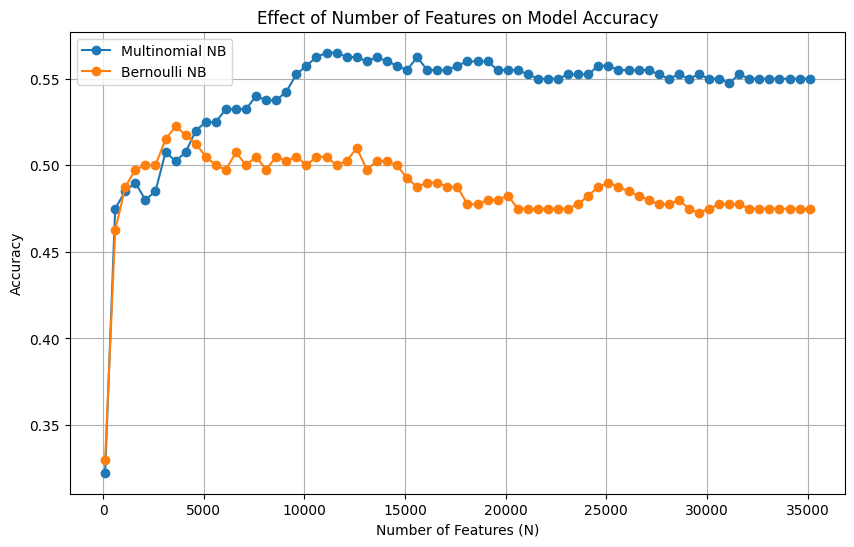

The best value for N for Multinomial Naive Bayes is: 11100
The best value for N for Bernoulli Naive Bayes is: 3600


In [4]:
# Part 1 Question 4 Code

# First of all, I am going to find best N by using for loop to iterate through all values of N.
# Second thing is I will give maximum value possible of N by finding the vocabulary size i.e. the length of vectorizer.
# But, I will use the vectorizer on the WHOLE dataset rather than training data that we did before, because this seems appropriate
# I CAN'T test all values incrementally by intervals of 1 in for loop,.. so i will test by intervals of 250 i.e. step size of 250

import matplotlib.pyplot as plt

# Combine the train and test sets to find the total vocabulary size
X_combined = pd.concat([X_train, X_test])

# Fit the CountVectorizer on the entire dataset to get the vocabulary size
# The underscore after vectorizer ensures only UNIQUE words are considered.
vectorizer_full = CountVectorizer()
vectorizer_full.fit(X_combined['Concatenated'])
vocab_size = len(vectorizer_full.vocabulary_)
print(f"Total number of unique words (features) in the dataset: {vocab_size}")
# Get the vocabulary (dictionary of words and their indices)
vocabulary = vectorizer_full.vocabulary_


# Define the range of N values to test
n_values = range(100, vocab_size + 1, 500)  # Adjust the step size as needed

# Initialize lists to store results
mnb_accuracies = []
bnb_accuracies = []

for n in n_values:
    # Vectorize the text data with limited features (fit on training data only)
    vectorizer = CountVectorizer(max_features=n)
    X_train_vec = vectorizer.fit_transform(X_train['Concatenated'])
    X_test_vec = vectorizer.transform(X_test['Concatenated'])
    
    # Train and evaluate the Multinomial Naive Bayes model
    mnb = MultinomialNB()
    mnb.fit(X_train_vec, y_train)
    y_pred_mnb = mnb.predict(X_test_vec)
    mnb_accuracies.append(accuracy_score(y_test, y_pred_mnb))
    
    # Train and evaluate the Bernoulli Naive Bayes model
    bnb = BernoulliNB()
    bnb.fit(X_train_vec, y_train)
    y_pred_bnb = bnb.predict(X_test_vec)
    bnb_accuracies.append(accuracy_score(y_test, y_pred_bnb))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, mnb_accuracies, label='Multinomial NB', marker='o')
plt.plot(n_values, bnb_accuracies, label='Bernoulli NB', marker='o')
plt.xlabel('Number of Features (N)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Features on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Identify the best value for N
best_n_index_mnb = mnb_accuracies.index(max(mnb_accuracies))
best_n_mnb = n_values[best_n_index_mnb]
best_n_index_bnb = bnb_accuracies.index(max(bnb_accuracies))
best_n_bnb = n_values[best_n_index_bnb]

print(f'The best value for N for Multinomial Naive Bayes is: {best_n_mnb}')
print(f'The best value for N for Bernoulli Naive Bayes is: {best_n_bnb}')





**Part 1 Question 5**

*I have compared the metrics of 4 methods: SVM, k-NN, Decision Trees and Random Forests.
And as I expected, SVM and Random Forests give near equal accuracy as BNB and MNB.*

k-NN and Decision Trees are not as good I feel. k-NN can vary rapidly depending on dataset and the value of 'n' i.e. the number of nearest neighbours.

Decision Trees are very basic model compared to Random Forests. It is also prone to overfitting compared to Random Forests.

And among, SVM and Random Forests, SVM is more popular in industry and more used for classification.
But SVM training is extremely time consuming.
Random Forest is faster and almost as good.

**Hence, the below code is for Random Forest.**

FAIR WARNING : Running this Jupyter Cell takes 2 minutes.

Things to note:
Calculating the value of 'N' i.e. the number of top most frequent words in the vectorizer, takes a LONG time.
Hence, I am just testing the approximate best value of N of BNB and MNB i.e. 4000 and 11000.
ANOTHER THING is I don't need to struggle to find best hyperparameters. I can use GridSearchCV function for that.
However, obviously, I am only using the most frequently tested parameter values in Machine Learning courses and code I have seen.
e.g. n_estimators': [50, 100, 200] which is the number of trees in an ensemble method.

How Random Forests Work:
Random Forests is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes of the individual trees.
Each tree in the forest is built on a random subset of the data, and a random subset of the features is considered at each split in the tree.
This randomization helps to make Random Forests robust against overfitting and improves generalization.

Features of Random Forests:
High Dimensionality: Random Forests can handle high-dimensional data effectively, making them suitable for text classification tasks.
Robustness to Overfitting: By averaging multiple decision trees, Random Forests reduce the risk of overfitting compared to a single decision tree.
Versatility: Random Forests can handle both numerical and categorical data and are effective in various classification tasks, including text classification.

**Implementation:
Hyperparameter Tuning: Tune the number of trees (n_estimators), maximum depth (max_depth), and minimum samples for splitting (min_samples_split) using cross-validation.**

**Hypothesis:
Given the strengths of Random Forests in handling high-dimensional and sparse data and their robustness against overfitting, it is hypothesized that Random Forests will perform comparably to or better than BNB and MNB in terms of overall accuracy and F1-score.**

Total number of unique words (features) in the dataset: 35294


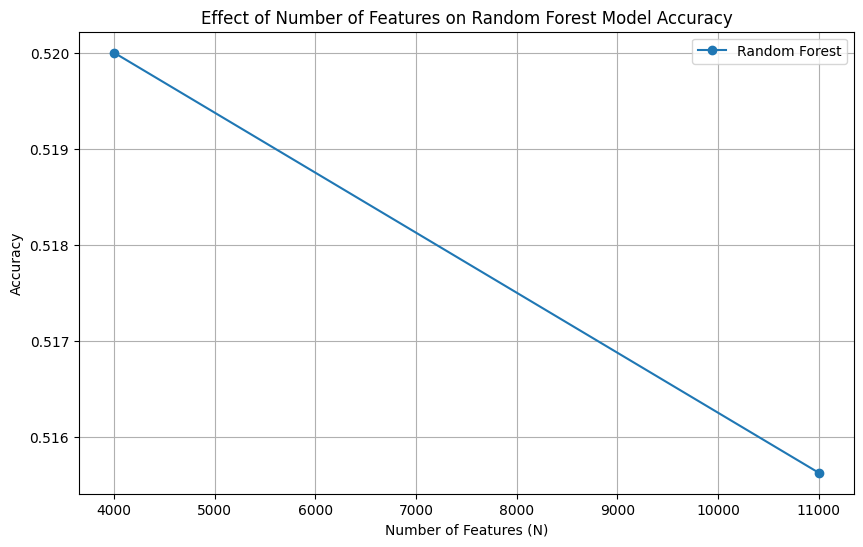

The best value for N for Random Forest is: 4000
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Final Random Forest Model
Accuracy: 0.555
Precision: 0.5590250388117832
Recall: 0.555
F1 Score: 0.5439647777213675


In [5]:
# Part 1 Question 5 Code

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Combine the train and test sets to find the total vocabulary size
X_combined = pd.concat([X_train, X_test])

# Fit the CountVectorizer on the entire dataset to get the vocabulary size
vectorizer_full = CountVectorizer()
vectorizer_full.fit(X_combined['Concatenated'])
vocab_size = len(vectorizer_full.vocabulary_)
print(f"Total number of unique words (features) in the dataset: {vocab_size}")

# Define the range of N values to test
# n_values = range(100, vocab_size + 1, 2500)  # Adjust the step size as needed
n_values = [4000, 11000]

# Initialize lists to store results
rf_accuracies = []
best_params_rf = []

for n in n_values:
    # Vectorize the text data with limited features (fit on training data only)
    vectorizer = CountVectorizer(max_features=n)
    X_train_vec = vectorizer.fit_transform(X_train['Concatenated'])
    X_test_vec = vectorizer.transform(X_test['Concatenated'])
    
    # Initialize Random Forest model with hyperparameter tuning
    rf_model = RandomForestClassifier()
    
    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Perform grid search
    grid_search.fit(X_train_vec, y_train)
    
    # Best Random Forest model after hyperparameter tuning
    best_rf_model = grid_search.best_estimator_
    best_params_rf.append(grid_search.best_params_)
    
    # Perform cross-validation predictions
    y_pred_rf = cross_val_predict(best_rf_model, X_train_vec, y_train, cv=5)
    
    # Calculate accuracy and store the result
    rf_accuracy = accuracy_score(y_train, y_pred_rf)
    rf_accuracies.append(rf_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, rf_accuracies, label='Random Forest', marker='o')
plt.xlabel('Number of Features (N)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Features on Random Forest Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Identify the best value for N
best_n_index_rf = rf_accuracies.index(max(rf_accuracies))
best_n_rf = n_values[best_n_index_rf]
best_params_rf_model = best_params_rf[best_n_index_rf]

print(f'The best value for N for Random Forest is: {best_n_rf}')
print(f'Best Parameters for Random Forest: {best_params_rf_model}')

# Final model training and evaluation with the best N
vectorizer = CountVectorizer(max_features=best_n_rf)
X_train_vec = vectorizer.fit_transform(X_train['Concatenated'])
X_test_vec = vectorizer.transform(X_test['Concatenated'])

best_rf_model = RandomForestClassifier(**best_params_rf_model)
best_rf_model.fit(X_train_vec, y_train)
y_pred_rf = best_rf_model.predict(X_test_vec)

# Calculate final metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Final Random Forest Model")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")


**Double click this Markdown to see properly the values**

Multinomial Naive Bayes Model
            Metric     Score
0         Accuracy  0.547000
1  Micro Precision  0.547000
2     Micro Recall  0.547000
3         Micro F1  0.547000
4  Macro Precision  0.546462
5     Macro Recall  0.547000
6         Macro F1  0.540982

Bernoulli Naive Bayes Model
             Metric     Score
0         Accuracy  0.515500
1  Micro Precision  0.515500
2     Micro Recall  0.515500
3         Micro F1  0.515500
4  Macro Precision  0.579861
5     Macro Recall  0.515500
6         Macro F1  0.522625


Final Random Forest Model
Accuracy: 0.525
Precision: 0.5378142967369065
Recall: 0.525
F1 Score: 0.5128116578392301


The best value for N for Multinomial Naive Bayes is: 11100
The best value for N for Bernoulli Naive Bayes is: 3600
The best value for N for Random Forest is: 4000



**The metrics show that BNB, MNB and Random Forest Model perform equally well.
So, I won't say that my hypothesis that Random Forest will work better than BNB and MNB to be correct.**

MNB is slightly better than both BNB and Random Forest.

**HENCE, I CHOOSE Multinomial Naive Bayes as the best method.**
**Also, for it the best value of N is 11600**

I dont think GridSearchCV should be used with MNB to find the "best settings". 
I tried GridSearchCV and got bad results. Also, MNB is a probabilistic model.
Though it can be interpreted linearly with the Mean Squared Error idea, in my general experience, trying to hyper-parameterize it always
leads to bad results, as its hard to generalize.

**Hence, I am sticking with base MNB model.**

In [6]:
# The following is our MNB model
# I will be using the N value of 11600 gotten for MNB from Part 1
# In Part 1, I had trained the MNB model using the dataset.
# We must not use a trained model for Part 2
# Hence, I am just setting up an untrained MNB model for now.

from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

# Initialize the model
mnb = MultinomialNB()

# X_vec = vectorizer.fit_transform(X)

# # Train the final MNB model on the entire dataset
# mnb.fit(X_vec, y)



# PART 2

**Part 2 Question 1**

###### Now for User 3 . I choose the following keywords:-

###### animation ---- lion princess bear
###### comedy	 ---- Ferrell trip
###### drama	 ---- wedding 
###### family	 ---- baseball Christmas adventure

In [7]:
# Part 2 Question 1 Code

# First of all, I asked lecturer why we are training on week 1 to week 3 data and also Week 4 in Part 2 instead of whole dataset in Part 1.
# i.e. what about the last 50 rows of a genre .. i.e. for example 200th to 250th row of 1st 250 rows.
# So, he said its for getting slightly different data for testing purposes i.e. seeing generalizability.
# In this Question, we train classifier on week 1 to week 3 data , and then test it again by inputing same week 1 to week 3 data.
# While that makes no sense, and you feel it will just show overfitting, I and lecturer feels it wont.. Most of us will choose MNB anyway
# Like I said before about training hyperparameters with such probabilistic models, you almost never get 100% accuracy even if you test 
# same data.

# First, I have X and y each of 2000 rows. I want to take first 150 of each 250 rows block and concatenate all that to a table called Week1to3
# Similarly, take 151st to 200th , 401th to 450th etc .... and concatenate all to Week 4 data

import pandas as pd

# Assuming X and y are your dataframes
X_selected_week1to3 = pd.concat([X.iloc[0:150], X.iloc[250:400], X.iloc[500:650], X.iloc[750:900], X.iloc[1000:1150], X.iloc[1250:1400], X.iloc[1500:1650], X.iloc[1750:1900]])
Week1to3_X = pd.DataFrame(X_selected_week1to3)

y_selected_week1to3 = pd.concat([y.iloc[0:150], y.iloc[250:400], y.iloc[500:650], y.iloc[750:900], y.iloc[1000:1150], y.iloc[1250:1400], y.iloc[1500:1650], y.iloc[1750:1900]])
Week1to3_y = pd.DataFrame(y_selected_week1to3)

# New ranges for Week 4
X_selected_week4 = pd.concat([X.iloc[150:200], X.iloc[400:450], X.iloc[650:700], X.iloc[900:950], X.iloc[1150:1200], X.iloc[1400:1450], X.iloc[1650:1700], X.iloc[1900:1950]])
Week4_X = pd.DataFrame(X_selected_week4)

y_selected_week4 = pd.concat([y.iloc[150:200], y.iloc[400:450], y.iloc[650:700], y.iloc[900:950], y.iloc[1150:1200], y.iloc[1400:1450], y.iloc[1650:1700], y.iloc[1900:1950]])
Week4_y = pd.DataFrame(y_selected_week4)



from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer with a maximum of 11600 features
vectorizer = TfidfVectorizer(max_features=11600)

# Fit the vectorizer on the 'Concatenated' column and learn vocabulary
vectorizer.fit(Week1to3_X['Concatenated'])


# OKAY, now the Vectorizer Vocabulary is trained.

# I GOT VERY HIGH ACCURACY i.e. 0.99 etc when I tested using same Week 1 to 3 data.
# So, as per lectuer said on Ed forum, "you would have to choose a third dataset for training the model, which could be a subset of the training set, using a validation set."
# WE will train the model using the random splitted data.

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(Week1to3_X, Week1to3_y['Genre'], test_size=0.4, random_state=42)
# I USED TEST SIZE 0.4 to reduce accuracy of model, since we are going to run the model on the same but whole dataset again.

# Fit and transform the training data # Convert text data into TF-IDF weights
X_train_tfidf = vectorizer.transform(X_train['Concatenated'])

# Transform the validation data #Convert text data into TF-IDF weights
X_test_tfidf = vectorizer.transform(X_test['Concatenated'])

# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Predict the output class for the validation data
y_pred_val = mnb.predict(X_test_tfidf)


# I got accuracy of 0.46, which is a correct ideology for the purposes of this assignment and dataset given.
# I got confused when it was mentioned to train model on Week 1 to Week 3 data. 
# Then, I thought I got to test model on the whole Week1 to Week 3 data.
# No, I can split into train and test.
# I dont need to use full dataset again to train the model.

# Now, lets test this trained model on the whole Week 1 to Week 3 dataset
X_tfidf = vectorizer.transform(Week1to3_X['Concatenated'])

# # Predict the output class for the validation data
y_pred = mnb.predict(X_tfidf)


# I got accuracy of 0.74 which is okay for the purposes of this assignment.

# Next, lets combine columnwise the input dataset and the predicted output for ease ie.e. Week1to3_X and y_pred


# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Genre'])

# Reset indices to ensure alignment
Week1to3_X = Week1to3_X.reset_index(drop=True)
y_pred_df = y_pred_df.reset_index(drop=True)
Week1to3_y = Week1to3_y.reset_index(drop=True)

# Concatenate Week1to3_X, y_pred_df, and Week1to3_y column-wise
Week1to3_X_and_pred_and_true_y = pd.concat([Week1to3_X, y_pred_df, Week1to3_y], axis=1)
Week1to3_X_and_pred_and_true_y = Week1to3_X_and_pred_and_true_y.reset_index(drop=True)

# Filter the rows where the predicted genre matches the true genre
Week1to3_X_and_predtrue_y = Week1to3_X_and_pred_and_true_y[Week1to3_X_and_pred_and_true_y['Predicted Genre'] == Week1to3_X_and_pred_and_true_y['Genre']]

# Drop Genre colummn
Week1to3_X_and_predtrue_y = Week1to3_X_and_predtrue_y.drop(columns=['Genre'])

# Rename the column header from "Predicted Genre" to "Predicted and True Genre"
Week1to3_X_and_predtrue_y = Week1to3_X_and_predtrue_y.rename(columns={'Predicted Genre': 'Predicted and True Genre'})

# Reset indices to ensure alignment
Week1to3_X_and_predtrue_y = Week1to3_X_and_predtrue_y.reset_index(drop=True)


# Now lets start with User 1.tsv

# Load the TSV file without headers
user1_df = pd.read_csv('user1.tsv', delimiter='\t', header=None)

# Convert all words to lowercase # important otherwise lowercase of input X wont match later on when looking at atleast 1 common keyword.
user1_df = user1_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Assign meaningful headers
user1_df.columns = ['Genre', 'Keywords']


# Extract the unique genres from the 'Genre' column of user2_df
unique_genres = user1_df['Genre'].unique()
# print(unique_genres)

# Filter Week1to3_X_and_pred_y to only include rows where 'Predicted' is in unique_genres
filtered_df = Week1to3_X_and_predtrue_y[Week1to3_X_and_predtrue_y['Predicted and True Genre'].isin(unique_genres)]

# Reset indices to ensure alignment
filtered_df = filtered_df.reset_index(drop=True)

# Sort the DataFrame based on the alphabetical order of "Predicted Genre"
filtered_df = filtered_df.sort_values(by='Predicted and True Genre', ascending=True)

# Reset the index to have a clean DataFrame after sorting
filtered_df = filtered_df.reset_index(drop=True)


# Merge the DataFrames on 'Predicted and True Genre' of Input and 'Genre' of user1.tsv
merged_df = pd.merge(filtered_df, user1_df, left_on='Predicted and True Genre', right_on='Genre', how='inner')

# Function to check for common words between 'Concatenated' and 'Keywords'
# Also, I think I am pretty sure.. it checks for EXACT match only .. so words like 'cat' and 'catch' WONT match.
def has_common_words(row):
    concatenated_words = set(row['Concatenated'].split())
    keywords_words = set(row['Keywords'].split())
    return len(concatenated_words.intersection(keywords_words)) > 0

# Apply the function to filter rows with at least one common word
filtered_merged_df = merged_df[merged_df.apply(has_common_words, axis=1)]

# Reset index to clean up the DataFrame
filtered_merged_df = filtered_merged_df.reset_index(drop=True)


# Remove the "Genre" and "Keywords" and "Title" columns
filtered_merged_df = filtered_merged_df.drop(columns=['Genre', 'Keywords', 'Title'])

# Group by "Predicted and True" and concatenate the "Concatenated" column
grouped_df = filtered_merged_df.groupby('Predicted and True Genre', as_index=False).agg({
    'Concatenated': ' '.join
})

# Reset index to clean up the DataFrame
grouped_df = grouped_df.reset_index(drop=True)

user1_grouped_df = grouped_df # We will use later in Part 2 Question 2

# Fit and transform the "Concatenated" column
tfidf_matrix = vectorizer.transform(grouped_df['Concatenated'])


# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=grouped_df['Predicted and True Genre'], columns=vectorizer.get_feature_names_out())


# Function to get the top N words by TF-IDF value
def get_top_n_words(row, n=20):
    sorted_indices = row.argsort()[::-1][:n]
    return [row.index[i] for i in sorted_indices]
    # If you want to see the tfidf values also, then replace previous statement with this : return [(row.index[i], row[i]) for i in sorted_indices]

# Apply the function to get the top 20 words for each genre
top_words_df = tfidf_df.apply(lambda row: get_top_n_words(row), axis=1)

# Convert the series of lists into a DataFrame for better readability
top_words_df = top_words_df.apply(pd.Series)

# Setting to display all columns and enable horizontal scrolling
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)  # Display all columns
print("Here's the 20 top words for User 1")
display(HTML(top_words_df.to_html()))  # Render the DataFrame as HTML with scrollable output



# NOW, for User 2.tsv # I Dont have the mental energy to write a function to condense this code for the 3 users.

# Load the TSV file without headers
user2_df = pd.read_csv('user2.tsv', delimiter='\t', header=None)

# Convert all words to lowercase # important otherwise lowercase of input X wont match later on when looking at atleast 1 common keyword.
user2_df = user2_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Assign meaningful headers
user2_df.columns = ['Genre', 'Keywords']

# Extract the unique genres from the 'Genre' column of user2_df
unique_genres = user2_df['Genre'].unique()


# Filter Week1to3_X_and_pred_y to only include rows where 'Predicted' is in unique_genres
filtered_df = Week1to3_X_and_predtrue_y[Week1to3_X_and_predtrue_y['Predicted and True Genre'].isin(unique_genres)]

# Reset indices to ensure alignment
filtered_df = filtered_df.reset_index(drop=True)

# Sort the DataFrame based on the alphabetical order of "Predicted Genre"
filtered_df = filtered_df.sort_values(by='Predicted and True Genre', ascending=True)

# Reset the index to have a clean DataFrame after sorting
filtered_df = filtered_df.reset_index(drop=True)

# Merge the DataFrames on 'Predicted Genre' of Input and 'Genre' of user2.tsv
merged_df = pd.merge(filtered_df, user2_df, left_on='Predicted and True Genre', right_on='Genre', how='inner')

# Function to check for common words between 'Concatenated' and 'Keywords'
# Also, I think I am pretty sure.. it checks for EXACT match only .. so words like 'cat' and 'catch' WONT match.
def has_common_words(row):
    concatenated_words = set(row['Concatenated'].split())
    keywords_words = set(row['Keywords'].split())
    return len(concatenated_words.intersection(keywords_words)) > 0

# Apply the function to filter rows with at least one common word
filtered_merged_df = merged_df[merged_df.apply(has_common_words, axis=1)]

# Reset index to clean up the DataFrame
filtered_merged_df = filtered_merged_df.reset_index(drop=True)

# Remove the "Genre" and "Keywords" columns
filtered_merged_df = filtered_merged_df.drop(columns=['Genre', 'Keywords', 'Title'])

# Group by "Predicted" and concatenate the "Concatenated" column
grouped_df = filtered_merged_df.groupby('Predicted and True Genre', as_index=False).agg({
    'Concatenated': ' '.join
})

# Reset index to clean up the DataFrame
grouped_df = grouped_df.reset_index(drop=True)

user2_grouped_df = grouped_df # We will use later in Part 2 Question 2

# Fit and transform the "Concatenated" column
tfidf_matrix = vectorizer.transform(grouped_df['Concatenated'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=grouped_df['Predicted and True Genre'], columns=vectorizer.get_feature_names_out())

# Function to get the top N words by TF-IDF value
def get_top_n_words(row, n=20):
    sorted_indices = row.argsort()[::-1][:n]
    return [row.index[i] for i in sorted_indices]
    # If you want to see the tfidf values also, then replace previous statement with this : return [(row.index[i], row[i]) for i in sorted_indices]

# Apply the function to get the top 20 words for each genre
top_words_df = tfidf_df.apply(lambda row: get_top_n_words(row), axis=1)

# Convert the series of lists into a DataFrame for better readability
top_words_df = top_words_df.apply(pd.Series)

# Setting to display all columns and enable horizontal scrolling
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)  # Display all columns
print("Here's the 20 top words for User 2")
display(HTML(top_words_df.to_html()))  # Render the DataFrame as HTML with scrollable output


# Now for User 3 . I choose the following keywords:-

# animation	lion princess bear
# comedy	Ferrell trip
# drama	    wedding 
# family	baseball Christmas adventure


# NOW, for User 3.tsv # I Dont have the mental energy to write a function to condense this code for the 3 users.

data_for_user3 = [
    ['animation', 'lion princess bear'],
    ['comedy', 'Ferrell trip'],
    ['drama', 'wedding'],
    ['family', 'baseball Christmas adventure']
]

# Convert to DataFrame
user3_df = pd.DataFrame(data_for_user3)

# Assign meaningful headers
user3_df.columns = ['Genre', 'Keywords']

# Convert all words to lowercase # important otherwise lowercase of input X wont match later on when looking at atleast 1 common keyword.
user3_df = user3_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Extract the unique genres from the 'Genre' column of user3_df
unique_genres = user3_df['Genre'].unique()
# print(unique_genres)

# Filter Week1to3_X_and_pred_y to only include rows where 'Predicted' is in unique_genres
filtered_df = Week1to3_X_and_predtrue_y[Week1to3_X_and_predtrue_y['Predicted and True Genre'].isin(unique_genres)]

# Reset indices to ensure alignment
filtered_df = filtered_df.reset_index(drop=True)

# Sort the DataFrame based on the alphabetical order of "Predicted Genre"
filtered_df = filtered_df.sort_values(by='Predicted and True Genre', ascending=True)

# Reset the index to have a clean DataFrame after sorting
filtered_df = filtered_df.reset_index(drop=True)

# Merge the DataFrames on 'Predicted Genre' of Input and 'Genre' of user3.tsv
merged_df = pd.merge(filtered_df, user3_df, left_on='Predicted and True Genre', right_on='Genre', how='inner')

# Function to check for common words between 'Concatenated' and 'Keywords'
# Also, I think I am pretty sure.. it checks for EXACT match only .. so words like 'cat' and 'catch' WONT match.
def has_common_words(row):
    concatenated_words = set(row['Concatenated'].split())
    keywords_words = set(row['Keywords'].split())
    return len(concatenated_words.intersection(keywords_words)) > 0

# Apply the function to filter rows with at least one common word
filtered_merged_df = merged_df[merged_df.apply(has_common_words, axis=1)]

# Reset index to clean up the DataFrame
filtered_merged_df = filtered_merged_df.reset_index(drop=True)

# Remove the "Genre" and "Keywords" columns
filtered_merged_df = filtered_merged_df.drop(columns=['Genre', 'Keywords', 'Title'])

# Group by "Predicted" and concatenate the "Concatenated" column
grouped_df = filtered_merged_df.groupby('Predicted and True Genre', as_index=False).agg({
    'Concatenated': ' '.join
})

# Reset index to clean up the DataFrame
grouped_df = grouped_df.reset_index(drop=True)

user3_grouped_df = grouped_df # We will use later in Part 2 Question 2

# Fit and transform the "Concatenated" column
tfidf_matrix = vectorizer.transform(grouped_df['Concatenated'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=grouped_df['Predicted and True Genre'], columns=vectorizer.get_feature_names_out())

# Function to get the top N words by TF-IDF value
def get_top_n_words(row, n=20):
    sorted_indices = row.argsort()[::-1][:n]
    return [row.index[i] for i in sorted_indices]
    # If you want to see the tfidf values also, then replace previous statement with this : return [(row.index[i], row[i]) for i in sorted_indices]

# Apply the function to get the top 20 words for each genre
top_words_df = tfidf_df.apply(lambda row: get_top_n_words(row), axis=1)

# Convert the series of lists into a DataFrame for better readability
top_words_df = top_words_df.apply(pd.Series)

# Setting to display all columns and enable horizontal scrolling
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)  # Display all columns
print("Here's the 20 top words for User 3")
display(HTML(top_words_df.to_html()))  # Render the DataFrame as HTML with scrollable output



C:\Users\Alok T P\AppData\Local\Temp\ipykernel_2608\3285582298.py:113: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user1_df = user1_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Here's the 20 top words for User 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Predicted and True Genre,,,,,,,,,,,,,,,,,,,,
animation,ref,bodi,shrek,sid,bear,adora,jerry,fiona,princess,garmadon,invid,tom,po,alex,dory,king,bolt,unicorn,manny,wallace
comedy,brad,cam,dusty,ben,ruth,marty,derrick,james,madea,mac,lou,baby,omar,peng,debora,da,billy,nick,tiffany,scarlet
drama,rudolf,gottalot,bathsheba,xuan,bradley,jesus,auggie,ito,shingo,gabriel,family,kuanana,hibiki,buchi,gilles,sofi,louis,mikael,ian,daiki
family,christmas,harry,akeelah,grinch,chipmunk,jake,kris,dumbledore,jack,santa,rus,ginny,rusty,dave,abbie,alan,slughorn,mr,pippi,ian
horror,vampire,koyomi,joseph,carrie,christine,house,priest,barnabas,tsubasa,lincoln,max,shot,koichi,lucian,mishima,heidi,kiss,venkenheim,charley,haruka
romance,takeo,dance,rinko,ella,nick,suna,xiang,katey,rafael,bao,chris,charles,johnny,tamsin,fran,javier,jamie,mona,love,iris
sci-fi,alien,ship,robot,earth,crew,hawk,harrigan,davidge,planet,zane,human,gardner,dr,creature,caesar,ramsay,kill,spider,luther,alex
thriller,sara,police,michael,kill,amy,murder,car,mort,killer,jonathan,joe,man,terri,house,andi,jill,jennifer,david,shoot,tell


Here's the 20 top words for User 2


C:\Users\Alok T P\AppData\Local\Temp\ipykernel_2608\3285582298.py:200: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user2_df = user2_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Predicted and True Genre,,,,,,,,,,,,,,,,,,,,
animation,bear,bug,bodi,rabbit,lumpy,smurf,pooh,kenai,oopsy,elmer,roo,frylock,scattergood,care,gargamel,humphrey,daffy,smurfette,wallace,oscar
comedy,irving,greg,billy,cam,marty,derrick,madea,chow,tatiana,kiki,tiffany,rodrick,jeanie,alan,road,carla,jiao,ruth,isi,frank
family,harry,pinocchio,dumbledore,jody,aladdin,voldemort,beth,ginny,magic,snow,popper,abbie,smurf,jafar,slughorn,iago,fred,pippi,white,child


Here's the 20 top words for User 3


C:\Users\Alok T P\AppData\Local\Temp\ipykernel_2608\3285582298.py:299: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user3_df = user3_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Predicted and True Genre,,,,,,,,,,,,,,,,,,,,
animation,bear,bodi,ref,adora,princess,invid,kenai,oopsy,alex,dory,unicorn,shrek,king,naveen,tiana,pooh,frylock,scattergood,care,humphrey
comedy,irving,greg,billy,brad,cam,dusty,marty,derrick,madea,tatiana,kiki,tiffany,rodrick,jeanie,carla,dylan,ruth,isi,alice,hattie
drama,bathsheba,gabriel,hibiki,sofi,ito,mikael,ian,louis,mindy,tianming,antoine,boldwood,karen,frank,salomina,farm,eye,fanny,suona,wedding
family,pinocchio,christmas,harry,akeelah,jody,grinch,chipmunk,jake,aladdin,kris,dumbledore,beth,santa,rus,ginny,rusty,dave,popper,abbie,alan


Comments on top 20 words : Not bad, but not that great also. Depends on dataset and its hard to decipher which words have actual
relation or meaning enough to represent the genre.

e.g. bathsheba showing in drama doesn't reflect drama in my opinion. 

My analysis is the top 20 words is imperfect.

**Part 2 Question 2**

1.) Metrics for Evaluation of Recommender Method

a.) Precision: Measures the proportion of recommended movies that the user likes out of the total recommended movies. It is defined as:

Precision = Number of liked recommended movies / Total number of recommended movies
​
This metric is crucial because it indicates the relevancy of the recommendations.

b.) Recall: Measures the proportion of liked movies that were recommended out of the total liked movies by the user. It is defined as:

Recall = Number of liked recommended movies / Total number of liked movies by the user
 
Recall is important to ensure that the system covers most of the user's interests.

c.) F1 Score: The harmonic mean of precision and recall, providing a balance between them:

F1 Score = (2 × Precision × Recall) / (Precision + Recall)
 
This metric is useful to get a single measure that balances both precision and recall.

d.) Accuracy: Not that much useful. The user only sees some small values of N recommended movies. The denominator of Accuracy is the whole
dataset which could be huge number. So, its not a good metric.


**I believe we care about PRECISION more than recall, because we will only show few recommendations to not overwhelm the user. So, precision will give us more of an actual picture of how good the recommender model is. If we use recall, the denominator is total number of movies he likes which can be a very LARGE number compared to number of recommendations N. Hence, the values with different N for recall will be too small to be useful to judge the model.**

**Hence, I believe PRECISION is the most important metric.**


2.) Choosing N (Number of Recommended Movies)
The value of N should be chosen based on how the movies will be presented and the need to obtain useful feedback. Here are some considerations:

**A higher N can ensure that the user is exposed to a larger variety of recommendations, increasing the chance that they will find something they like.
But, a higher number of recommended movies can overwhelm the user. 
As the number of recommendations increases, the precision decreases while recall usually increases.
Our primary concern is that there should be atleast 1 movie user will like out of the N recommended users. If there is atleast 1 movie he likes, he will stay in that website movie service or whatever and not go elsewhere, thus increasing business of movie company.
And as per question, "Pay attention to the large variety of movies and the need to obtain useful feedback from the user (i.e. they must like some movies shown to them)".
We cant increase N too much as to not overwhelm the user.** 

And so an appropriate value of N is 15.
Also, as I mentioned previously, PRECISION is the best metric.

**I choose N = 15**
**ALSO, I AM SHOWING N MOVIES IN TOTAL AND NOT N MOVIES PER GENRE**
This 15 I choose to be N movies in total rather than N movies per genre, because if user likes only few genre, then the value of N has to be given large value to have atleast some movie he likes in the recommended movies etc.
I will endeavour to ensure that N movies in total will have movies from all the genres the user mentions in the user preferences i.e. user.
tsv

3.) Choosing M (Number of Words in User Profile for Each Genre)

M is the number of words in user.tsv and not user profile.
M is used to limit the keywords given to generate a user profile.
I am thinking I will use the first M words in a genre in user.tsv 
Taking random M number of words might be pain.

The value of M should be chosen based on the trade-off between specificity and generality:

Smaller M: Focuses on the most significant words, leading to more specific and possibly more accurate recommendations.
Larger M: Includes more words, capturing a broader range of interests but potentially adding noise.

**I can start with a small M and the maximum M will be the number of words in the genre which has most words in user.tsv**

In [8]:
# Part 2 Question 2

Week4_X_tfidf = vectorizer.transform(Week4_X['Concatenated'])
Week4_pred_y = mnb.predict(Week4_X_tfidf)

# Convert y_pred to a DataFrame
Week4_pred_y_df = pd.DataFrame(Week4_pred_y, columns=['Predicted Genre'])

# Reset indices to ensure alignment
Week4_X = Week4_X.reset_index(drop=True)
Week4_pred_y_df = Week4_pred_y_df.reset_index(drop=True)

# Concatenate Week4_X and Week4_pred_y_df columnwise
Week4_combined_df = pd.concat([Week4_X, Week4_pred_y_df], axis=1)

# Reset indices to ensure alignment
Week4_combined_df = Week4_combined_df.reset_index(drop=True)


# Okay, Week 4 data has been set.

# Lets start with User 1 profile.

# Extract the list of valid genres from user1_grouped
valid_genres = user1_grouped_df['Predicted and True Genre'].tolist()

# Remove all rows which have genres not in user1_grouped_df
Week4_user1_filtered_df = Week4_combined_df[Week4_combined_df['Predicted Genre'].isin(valid_genres)]

# Reset indices to ensure alignment
Week4_user1_filtered_df = Week4_user1_filtered_df.reset_index(drop=True)

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np
import pandas as pd

# Define values for M and similarity methods
M_values = [10, 100, 1000]
similarity_methods = ['cosine', 'euclidean']

# Initialize the results DataFrame
results = []

# Outer loop: Loop through values of M
for M in M_values:
    # Vectorize user profiles and Week 4 movies with top M terms
    vectorizer = TfidfVectorizer(max_features=M)
    
    # Fit and transform user profiles
    user_profiles_tfidf = vectorizer.fit_transform(user1_grouped_df['Concatenated'].dropna())
    user_profiles_df = pd.DataFrame(user_profiles_tfidf.toarray(), index=user1_grouped_df['Predicted and True Genre'].dropna(), columns=vectorizer.get_feature_names_out())
    
    # Transform Week 4 movie plots
    week4_tfidf = vectorizer.transform(Week4_user1_filtered_df['Concatenated'])
    week4_df = pd.DataFrame(week4_tfidf.toarray(), index=Week4_user1_filtered_df['Concatenated'], columns=vectorizer.get_feature_names_out())

    # Next inner loop: Loop through similarity methods
    for method in similarity_methods:
        # Next inner loop: Loop through each movie in Week4_filtered_df
        for i, row in Week4_user1_filtered_df.iterrows():
            movie_vector = week4_df.loc[row['Concatenated']].values.reshape(1, -1)
            movie_plot = row['Concatenated']
            title = row['Title']
            predicted_genre_movie = row['Predicted Genre']

            # Innermost loop: Loop through each genre in user1_grouped_df
            for j, genre_row in user1_grouped_df.iterrows():
                genre_vector = user_profiles_df.loc[genre_row['Predicted and True Genre']].values.reshape(1, -1)
                predicted_genre_profile = genre_row['Predicted and True Genre']

                # Calculate similarity
                if method == 'cosine':
                    similarity = cosine_similarity(movie_vector, genre_vector)[0][0]
                elif method == 'euclidean':
                    similarity = euclidean_distances(movie_vector, genre_vector)[0][0]

                # Store the result
                results.append([M, method, movie_plot, title, predicted_genre_movie, predicted_genre_profile, similarity])

# Convert results to DataFrame
user1_results_df = pd.DataFrame(results, columns=['M', 'Similarity Method', 'Concatenated Movie Plot', 'Title', 'Predicted Genre', 'Predicted and True Genre', 'Similarity'])


# Lets start with User 2 profile.

# Extract the list of valid genres from user2_grouped
valid_genres = user2_grouped_df['Predicted and True Genre'].tolist()


# Remove all rows which have genres not in user2_grouped_df
Week4_user2_filtered_df = Week4_combined_df[Week4_combined_df['Predicted Genre'].isin(valid_genres)]

# Reset indices to ensure alignment
Week4_user2_filtered_df = Week4_user2_filtered_df.reset_index(drop=True)


from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np
import pandas as pd

# Define values for M and similarity methods
M_values = [10, 100, 1000]
similarity_methods = ['cosine', 'euclidean']

# Initialize the results DataFrame
results = []

# Outer loop: Loop through values of M
for M in M_values:
    # Vectorize user profiles and Week 4 movies with top M terms
    vectorizer = TfidfVectorizer(max_features=M)
    
    # Fit and transform user profiles
    user_profiles_tfidf = vectorizer.fit_transform(user2_grouped_df['Concatenated'].dropna())
    user_profiles_df = pd.DataFrame(user_profiles_tfidf.toarray(), index=user2_grouped_df['Predicted and True Genre'].dropna(), columns=vectorizer.get_feature_names_out())
    
    # Transform Week 4 movie plots
    week4_tfidf = vectorizer.transform(Week4_user2_filtered_df['Concatenated'])
    week4_df = pd.DataFrame(week4_tfidf.toarray(), index=Week4_user2_filtered_df['Concatenated'], columns=vectorizer.get_feature_names_out())

    # Next inner loop: Loop through similarity methods
    for method in similarity_methods:
        # Next inner loop: Loop through each movie in Week4_filtered_df
        for i, row in Week4_user2_filtered_df.iterrows():
            movie_vector = week4_df.loc[row['Concatenated']].values.reshape(1, -1)
            movie_plot = row['Concatenated']
            title = row['Title']
            predicted_genre_movie = row['Predicted Genre']

            # Innermost loop: Loop through each genre in user2_grouped_df
            for j, genre_row in user2_grouped_df.iterrows():
                genre_vector = user_profiles_df.loc[genre_row['Predicted and True Genre']].values.reshape(1, -1)
                predicted_genre_profile = genre_row['Predicted and True Genre']

                # Calculate similarity
                if method == 'cosine':
                    similarity = cosine_similarity(movie_vector, genre_vector)[0][0]
                elif method == 'euclidean':
                    similarity = euclidean_distances(movie_vector, genre_vector)[0][0]

                # Store the result
                results.append([M, method, movie_plot, title, predicted_genre_movie, predicted_genre_profile, similarity])

# Convert results to DataFrame
user2_results_df = pd.DataFrame(results, columns=['M', 'Similarity Method', 'Concatenated Movie Plot', 'Title', 'Predicted Genre', 'Predicted and True Genre', 'Similarity'])


# Lets start with User 3 profile.

# Extract the list of valid genres from user3_grouped
valid_genres = user3_grouped_df['Predicted and True Genre'].tolist()


# Remove all rows which have genres not in user3_grouped_df
Week4_user3_filtered_df = Week4_combined_df[Week4_combined_df['Predicted Genre'].isin(valid_genres)]

# Reset indices to ensure alignment
Week4_user3_filtered_df = Week4_user3_filtered_df.reset_index(drop=True)


from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np
import pandas as pd

# Define values for M and similarity methods
M_values = [10, 100, 1000]
similarity_methods = ['cosine', 'euclidean']

# Initialize the results DataFrame
results = []

# Outer loop: Loop through values of M
for M in M_values:
    # Vectorize user profiles and Week 4 movies with top M terms
    vectorizer = TfidfVectorizer(max_features=M)
    
    # Fit and transform user profiles
    user_profiles_tfidf = vectorizer.fit_transform(user3_grouped_df['Concatenated'].dropna())
    user_profiles_df = pd.DataFrame(user_profiles_tfidf.toarray(), index=user3_grouped_df['Predicted and True Genre'].dropna(), columns=vectorizer.get_feature_names_out())
    
    # Transform Week 4 movie plots
    week4_tfidf = vectorizer.transform(Week4_user3_filtered_df['Concatenated'])
    week4_df = pd.DataFrame(week4_tfidf.toarray(), index=Week4_user3_filtered_df['Concatenated'], columns=vectorizer.get_feature_names_out())

    # Next inner loop: Loop through similarity methods
    for method in similarity_methods:
        # Next inner loop: Loop through each movie in Week4_filtered_df
        for i, row in Week4_user3_filtered_df.iterrows():
            movie_vector = week4_df.loc[row['Concatenated']].values.reshape(1, -1)
            movie_plot = row['Concatenated']
            title = row['Title']
            predicted_genre_movie = row['Predicted Genre']

            # Innermost loop: Loop through each genre in user3_grouped_df
            for j, genre_row in user3_grouped_df.iterrows():
                genre_vector = user_profiles_df.loc[genre_row['Predicted and True Genre']].values.reshape(1, -1)
                predicted_genre_profile = genre_row['Predicted and True Genre']

                # Calculate similarity
                if method == 'cosine':
                    similarity = cosine_similarity(movie_vector, genre_vector)[0][0]
                elif method == 'euclidean':
                    similarity = euclidean_distances(movie_vector, genre_vector)[0][0]

                # Store the result
                results.append([M, method, movie_plot, title, predicted_genre_movie, predicted_genre_profile, similarity])

# Convert results to DataFrame
user3_results_df = pd.DataFrame(results, columns=['M', 'Similarity Method', 'Concatenated Movie Plot', 'Title', 'Predicted Genre', 'Predicted and True Genre', 'Similarity'])

# RESULTS SHOWN IN NEXT CELL


IF ERROR "NOT FITTED" OR "X HAS 10 FEATURES. MNB EXPECTS 11000 features" appear, then just run the Jupyter cell before the previous Jupyter cell as the vectorizer.fit function is in that cell.

I HAVE ALREADY EXPLAINED BEFORE WHY PRECISION IS THE ONLY METRIC THAT MATTERS. SO, I HAVE SHOWN PRECISION ONLY IN NEXT PART OF THE QUESTION.

**ALSO, I AM SHOWING N MOVIES IN TOTAL AND NOT N MOVIES PER GENRE**

In [9]:
# I have chosen N = 15 as I said earlier

def display_top_recommended_movies(user_results_df, user_id):
    # Define values for M and similarity methods
    M_values = [10, 100, 1000]
    similarity_methods = ['cosine', 'euclidean']

    print(f"These are the top 15 recommended movies for {user_id} and N = 15 ....\n")
    
    for M in M_values:
        for method in similarity_methods:
            print(f"M = {M}, Similarity Method = {method}")
            
            # Filter the dataframe based on the value of M and similarity method
            filtered_df = user_results_df[(user_results_df['M'] == M) & (user_results_df['Similarity Method'] == method)]
            
            # Group by concatenated movie plot and filter out the row with the highest similarity value in each group
            grouped_df = filtered_df.loc[filtered_df.groupby('Concatenated Movie Plot')['Similarity'].idxmax()]
            
            # Sort the rows in the order of similarity from highest to lowest
            sorted_df = grouped_df.sort_values(by='Similarity', ascending=False)
            
            # Show the titles of the top 15 similarity rows
            top_15_titles = sorted_df['Title'].head(15)
            
            # Print titles horizontally with a comma separating each title
            print(", ".join(top_15_titles.tolist()))
            print("\n")

# Display top recommended movies for User1
display_top_recommended_movies(user1_results_df, "User1")

# Display top recommended movies for User2
display_top_recommended_movies(user2_results_df, "User2")

# Display top recommended movies for User3
display_top_recommended_movies(user3_results_df, "User3")


These are the top 15 recommended movies for User1 and N = 15 ....

M = 10, Similarity Method = cosine
shutter, dragon ball curse blood rubies, pollyanna, woodshock, moonlight mile, ferdinand, dracula dark prince, lion, green inferno thethe green inferno, hot pursuit, hercules, trick r treat, red eye, lights, invitation


M = 10, Similarity Method = euclidean
assassin, iron cross, little sister, railway children, like hot, family secret le secret mre, came space, chihayafuru, chongqing hot pot, song, doppelganger, oliver story, jungle master, familia, offside


M = 100, Similarity Method = cosine
persepolis, dog flanders, joshua, lion, , longest ride, tammy, keeping promise, blue ruin, fun size, hot pursuit, skin, skyline, autumn new york, strange invaders


M = 100, Similarity Method = euclidean
railroad tigers, battle beneath earth, backkom bear agent, pov norowareta film, line, dead end, muscle beach tom, flying machine, henge, feedin kiddie, inerasable, fore, days nights, driverless

In [10]:
import pandas as pd

def calculate_precision(user_results_df, user_id):
    # Define values for M and similarity methods
    M_values = [10, 100, 1000]
    similarity_methods = ['cosine', 'euclidean']
    
    # Initialize the precision DataFrame
    precision_df = pd.DataFrame(index=similarity_methods, columns=[f"M={M}" for M in M_values])
    
    for M in M_values:
        for method in similarity_methods:
            # Filter the dataframe based on the value of M and similarity method
            filtered_df = user_results_df[(user_results_df['M'] == M) & (user_results_df['Similarity Method'] == method)]
            
            # Group by concatenated movie plot and filter out the row with the highest similarity value in each group
            grouped_df = filtered_df.loc[filtered_df.groupby('Concatenated Movie Plot')['Similarity'].idxmax()]
            
            # Sort the rows in the order of similarity from highest to lowest
            sorted_df = grouped_df.sort_values(by='Similarity', ascending=False)
            
            # Filter out the top 15 recommended movies
            top_15_df = sorted_df.head(15)
            
            # Calculate True Positives (TP) and False Positives (FP)
            TP = (top_15_df['Predicted Genre'] == top_15_df['Predicted and True Genre']).sum()
            FP = 15 - TP
            
            # Calculate Precision
            precision = TP / (TP + FP)
            
            # Store the precision value in the DataFrame
            precision_df.at[method, f"M={M}"] = precision
    
    # Print the precision values
    print(f"These are the PRECISION values for {user_id}:-\n")
    print(precision_df)

# Assuming you have the dataframes already loaded
# user1_results_df, user2_results_df, user3_results_df

# Calculate and display precision values for User1
calculate_precision(user1_results_df, "User1")
print() #newline

# Calculate and display precision values for User2
calculate_precision(user2_results_df, "User2")
print()#newline

# Calculate and display precision values for User3
calculate_precision(user3_results_df, "User3")
print() #newline

These are the PRECISION values for User1:-

               M=10 M=100 M=1000
cosine          0.2   0.4    0.8
euclidean  0.066667   0.0    0.0

These are the PRECISION values for User2:-

               M=10     M=100    M=1000
cosine     0.666667       0.8  0.933333
euclidean  0.133333  0.066667       0.0

These are the PRECISION values for User3:-

               M=10     M=100    M=1000
cosine     0.133333  0.733333       0.6
euclidean  0.133333       0.2  0.066667



In general, it looks correct. The values of cosine similarity increase as M increases.
The values of Euclidean distance decreases because of "Curse of dimensionality" and noise affects it more also.

Just for info, Contrary to perception, the lesser the Euclidean distance, the more the similarity between vectors.
The more the vectors are similar, the higher becomes the precision.
Since, the precision in the table above shows to decrease when M increases, it means in high dimensional space i.e.
with so many features or words, the Euclidean distance is increasing.

Cosine similarity exceptionally outperforms Euclidean Distance.  

**I will choose Cosine similarity.**


# PART 3

In [11]:
# Combine the dataframes column-wise
Week1to3_combined = pd.concat([Week1to3_X, Week1to3_y], axis=1)

# SINCE MY N = 15 , i have decided to take 2 movies RANDOMLY from each week of Week 1, 2 movies from each week of Week 2 and 5 movies from
# each Week of Week 3
# So, that will mean 2*8 = 16 movies will be in final Week_1 and Week_2 and Week_3.
# This is acceptable. 

# If I take 15 movies for EACH week of Week 1,2 and 3, it will be too much. There will be 15 * 8 = 120 in final Week_1_2_3 combined list
# Too much to show my friend

# Take 2 movies chosen at random for each “week”, for Weeks 1, 2 and 3,

def get_random_samples(df, ranges, sample_size):
    sampled_indices = []
    for start, end in ranges:
        range_indices = list(range(start, end))
        sampled_indices.extend(df.iloc[range_indices].sample(n=sample_size, random_state=1).index)
    return df.loc[sampled_indices]

# Define the ranges for each week
week_1_ranges = [(0, 50), (150, 200), (300, 350), (450, 500), (600, 650), (750, 800), (900, 950), (1050, 1100)]
week_2_ranges = [(50, 100), (200, 250), (350, 400), (500, 550), (650, 700), (800, 850), (950, 1000), (1100, 1150)]
week_3_ranges = [(100, 150), (250, 300), (400, 450), (550, 600), (700, 750), (850, 900), (1000, 1050), (1150, 1200)]

# Get random samples for each week
Week_1 = get_random_samples(Week1to3_combined, week_1_ranges, 2)
Week_2 = get_random_samples(Week1to3_combined, week_2_ranges, 2)
Week_3 = get_random_samples(Week1to3_combined, week_3_ranges, 2)

# Concatenate row-wise
combined_weeks = pd.concat([Week_1, Week_2, Week_3], axis=0)

# Combine the results into a single dataframe just for showing which all movies
combined_df = pd.DataFrame({
    'Week 1 Title': Week_1['Title'].values,
    'Week 1 Genre': Week_1['Genre'].values,
    'Week 2 Title': Week_2['Title'].values,
    'Week 2 Genre': Week_2['Genre'].values,
    'Week 3 Title': Week_3['Title'].values,
    'Week 3 Genre': Week_3['Genre'].values,
})

# Print the combined dataframe
print("These are the movies randomly chosen from the 3 week batches :-")
print(combined_df.to_string(index=False))





These are the movies randomly chosen from the 3 week batches :-
    Week 1 Title Week 1 Genre              Week 2 Title Week 2 Genre                 Week 3 Title Week 3 Genre
        bambi ii    animation    mickey christmas carol    animation                  waking life    animation
           shrek    animation clifford really big movie    animation                   cinderella    animation
            came       comedy      ryuzo seven henchmen       comedy                    teen lust       comedy
           table       comedy          american reunion       comedy                   alter egos       comedy
    glass castle        drama           legend ben hall        drama dressmaker thethe dressmaker        drama
heartfall arises        drama                   weirdos        drama                 finest hours        drama
           wraps       family                old yeller       family                moon spinners       family
   karate kid ii       family               harr

### The movies my friend likes are:

| Title                       | Genre     |
|-----------------------------|-----------|
| bambi ii                    | animation |
| shrek                       | animation |
| glass castle                | drama     |
| karate kid ii               | family    |
| mickey christmas carol      | animation |
| old yeller                  | family    |
| frozen                      | romance   |
| cinderella                  | animation |
| grinch stole christmas      | family    |


In [12]:
# List of movie titles my friend likes
liked_movies = [
    "bambi ii",
    "shrek",
    "glass castle",
    "karate kid ii",
    "mickey christmas carol",
    "old yeller",
    "frozen",
    "cinderella",
    "grinch stole christmas"
]

# Assuming combined_weeks is already defined
filtered_movies = combined_weeks[combined_weeks['Title'].isin(liked_movies)]

# Remove the "Title" column
filtered_movies = filtered_movies.drop(columns=['Title'])

# Group by "Genre" and concatenate the "Concatenated" fields
user_4 = filtered_movies.groupby('Genre')['Concatenated'].apply(lambda x: ' '.join(x)).reset_index()

print('This is my friends profile :-')
print()
print(user_4)
print(); print()

# user_4.to_csv('user_4.csv', index=False)


# To get highest value of M,  I can give, which will be lowest number of words in Concatenated column when looking at all rows

# Calculate the minimum number of words in the Concatenated column
min_word_count = user_4['Concatenated'].apply(lambda x: len(x.split())).min()

print("The lowest number of words in the Concatenated column is:", min_word_count)
print(f"The maximum value of M we can give is thus {min_word_count}")

This is my friends profile :-

       Genre                                       Concatenated
0  animation  bambi ii brian pimental alexander gould patric...
1      drama  glass castle destin daniel cretton destin dani...
2     family  karate kid ii john g avildsen ralph macchio pa...
3    romance  frozen derek kwok janice vidal janice man aari...


The lowest number of words in the Concatenated column is: 34
The maximum value of M we can give is thus 34


In [13]:
# Lets start by limiting Week 4 content to those genres User 4 is interested in.

# Extract the list of valid genres from user1_grouped
valid_genres = user_4['Genre'].tolist()

# Remove all rows which have genres not in user 4
Week4_user4_filtered_df = Week4_combined_df[Week4_combined_df['Predicted Genre'].isin(valid_genres)]

# Reset indices to ensure alignment
Week4_user4_filtered_df = Week4_user4_filtered_df.reset_index(drop=True)

# Week4_user4_filtered_df.to_csv('Week4filtered.csv', index=False)

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np
import pandas as pd

# Define values for M and similarity methods
M_values = [10, 20, 30]
similarity_methods = ['cosine', 'euclidean']

# Initialize the results DataFrame
results = []

# Outer loop: Loop through values of M
for M in M_values:
    # Vectorize user profiles and Week 4 movies with top M terms
    vectorizer = TfidfVectorizer(max_features=M)
    
    # Fit and transform user profiles
    user_profiles_tfidf = vectorizer.fit_transform(user_4['Concatenated'].dropna())
    user_profiles_df = pd.DataFrame(user_profiles_tfidf.toarray(), index=user_4['Genre'].dropna(), columns=vectorizer.get_feature_names_out())
    
    # Transform Week 4 movie plots
    week4_tfidf = vectorizer.transform(Week4_user4_filtered_df['Concatenated'])
    week4_df = pd.DataFrame(week4_tfidf.toarray(), index=Week4_user4_filtered_df['Concatenated'], columns=vectorizer.get_feature_names_out())

    # Next inner loop: Loop through similarity methods
    for method in similarity_methods:
        # Next inner loop: Loop through each movie in Week4_filtered_df
        for i, row in Week4_user4_filtered_df.iterrows():
            movie_vector = week4_df.loc[row['Concatenated']].values.reshape(1, -1)
            movie_plot = row['Concatenated']
            title = row['Title']
            predicted_genre_movie = row['Predicted Genre']

            # Innermost loop: Loop through each genre in user1_grouped_df
            for j, genre_row in user_4.iterrows():
                genre_vector = user_profiles_df.loc[genre_row['Genre']].values.reshape(1, -1)
                genre_profile = genre_row['Genre']

                # Calculate similarity
                if method == 'cosine':
                    similarity = cosine_similarity(movie_vector, genre_vector)[0][0]
                elif method == 'euclidean':
                    similarity = euclidean_distances(movie_vector, genre_vector)[0][0]

                # Store the result
                results.append([M, method, movie_plot, title, predicted_genre_movie, genre_profile, similarity])

# Convert results to DataFrame
user4_results_df = pd.DataFrame(results, columns=['M', 'Similarity Method', 'Concatenated Movie Plot', 'Title', 'Predicted Genre', 'Genre', 'Similarity'])

# user4_results_df.to_csv("user4_results.csv", index=False)


# I have chosen N = 15 as I said earlier

def display_top_recommended_movies_2nd_version(user_results_df, user_id):
    # Define values for M and similarity methods
    M_values = [10, 20, 30]
    similarity_methods = ['cosine', 'euclidean']

    print(f"These are the top 15 recommended movies for {user_id} and N = 15 ....\n")
    
    for M in M_values:
        for method in similarity_methods:
            print(f"M = {M}, Similarity Method = {method}")
            
            # Filter the dataframe based on the value of M and similarity method
            filtered_df = user_results_df[(user_results_df['M'] == M) & (user_results_df['Similarity Method'] == method)]
            
            # Group by concatenated movie plot and filter out the row with the highest similarity value in each group
            grouped_df = filtered_df.loc[filtered_df.groupby('Concatenated Movie Plot')['Similarity'].idxmax()]
            
            # Sort the rows in the order of similarity from highest to lowest
            sorted_df = grouped_df.sort_values(by='Similarity', ascending=False)
            
            # Show the titles of the top 15 similarity rows
            top_15_titles = sorted_df['Title'].head(15)
            
            # Print titles horizontally with a comma separating each title
            print(", ".join(top_15_titles.tolist()))
            print("\n")

# Display top recommended movies for my Friend
display_top_recommended_movies_2nd_version(user4_results_df, "My friend")


These are the top 15 recommended movies for My friend and N = 15 ....

M = 10, Similarity Method = cosine
toby tyler, beautiful thing, dog flanders, shrek, toshokan sens, magic riddle, happily n, hotel deluxe, voices, run wild run free, lady tramp, winnie pooh seasons giving, nightmare christmas, railroad tigers, railway children


M = 10, Similarity Method = euclidean
toshokan sens, beautiful thing, hotel deluxe, toby tyler, nightmare christmas, happily n, voices, lady tramp, magic riddle, winnie pooh seasons giving, run wild run free, shrek, dog flanders, railway children, railroad tigers


M = 20, Similarity Method = cosine
matchmaker, vanity fair, meet laws, rivers cross, walk remember, sky lovers, guilt trip, beautiful thing, pollyanna, jean joneses, virginia run, toby tyler, dog flanders, strange magic, flipper


M = 20, Similarity Method = euclidean
, ice age dawn dinosaurs, judy moody bummer summer, joshua, jean joneses, red robin thethe red robin, rivers cross, run wild run fr

### I showed him ALL the unique movie names, because I WANT TO FIND METRICS for every case of M and similarity method:-
### Double click to see markdown properly

beautiful thing
dog flanders
dr cabbie
flipper
guilt trip
hanson beast
happily n
hare brush
home range
hotel deluxe
ice age dawn dinosaurs
incredible journey
jean joneses
joshua
judy moody bummer summer
kind words
kung fu panda
lady tramp
like hot
love lifting
magic riddle
matchmaker
meditation park
meet laws
muscle beach tom
nightmare christmas
nights desert
norm north
pooh grand adventure search christopher robin
pollyanna
quest love
railroad tigers
railway children
red robin thethe red robin
rivers cross
run wild run free
shed skin papa
shrek
sky lovers
strange magic
toby tyler
toshokan sens
vanity fair
virginia run
voices
walk remember
winnie pooh seasons giving
wolves willoughby chase

The 18 movies he likes from the list are :-

beautiful thing
flipper
happily n
hare brush
home range
ice age dawn dinosaurs
kind words
kung fu panda
lady tramp
like hot
magic riddle
meet laws
muscle beach tom
nights desert
pollyanna
red robin thethe red robin
run wild run free
shrek

In [14]:
import pandas as pd

# List of movies my friend likes
liked_movies = [
    'beautiful thing', 'flipper', 'happily n', 'hare brush', 'home range', 'ice age dawn dinosaurs',
    'kind words', 'kung fu panda', 'lady tramp', 'like hot', 'magic riddle', 'meet laws', 'muscle beach tom',
    'nights desert', 'pollyanna', 'red robin thethe red robin', 'run wild run free', 'shrek'
]

def calculate_precision_2nd_version(user_results_df, user_id):
    # Define values for M and similarity methods
    M_values = [10, 20, 30]
    similarity_methods = ['cosine', 'euclidean']
    
    # Initialize the precision DataFrame
    precision_df = pd.DataFrame(index=similarity_methods, columns=[f"M={M}" for M in M_values])
    
    for M in M_values:
        for method in similarity_methods:
            # Filter the dataframe based on the value of M and similarity method
            filtered_df = user_results_df[(user_results_df['M'] == M) & (user_results_df['Similarity Method'] == method)]
            
            # Group by concatenated movie plot and filter out the row with the highest similarity value in each group
            grouped_df = filtered_df.loc[filtered_df.groupby('Concatenated Movie Plot')['Similarity'].idxmax()]
            
            # Sort the rows in the order of similarity from highest to lowest
            sorted_df = grouped_df.sort_values(by='Similarity', ascending=False)
            
            # Filter out the top 15 recommended movies
            top_15_df = sorted_df.head(15)
            
            # Remove empty string movies
            top_15_df = top_15_df[top_15_df['Title'].str.strip() != '']
            
            # Calculate the number of recommendations after removing empty strings
            num_recommendations = len(top_15_df)
            
            # Calculate True Positives (TP) and False Positives (FP)
            TP = top_15_df['Title'].apply(lambda x: x in liked_movies).sum()
            FP = num_recommendations - TP
            
            # Calculate Precision
            if num_recommendations > 0:
                precision = TP / num_recommendations
            else:
                precision = 0.0
            
            # Store the precision value in the DataFrame
            precision_df.at[method, f"M={M}"] = precision
    
    # Print the precision values
    print(f"These are the PRECISION values for {user_id}:-\n")
    print(precision_df)

# Calculate and display precision values for My friend
calculate_precision_2nd_version(user4_results_df, "My friend")


These are the PRECISION values for My friend:-

          M=10      M=20      M=30
cosine     0.4  0.266667  0.333333
euclidean  0.4       0.5  0.357143


**Precision: The precision is not good enough because of low value of M, because the batchsize created from N = 2 taken randomly only amounted to very few movies, and hence fewer concatenated words.**

**So, I infer that, Higher the movies we know he is interested in, better becomes our recommendations.**

**So, this is the major difference in metrics between Part 2 and one obtained from user => Precision is low and M is low.**


I think that incorporating additional contextual information (e.g., recent watch history, mood, specific interests) could further improve the accuracy of recommendations.


My friend found some of the recommendations really good, especially for the genres he was interested in.

But, he didn't like most of the recommendations, as most of these movies were released years ago, and he thought they were old-fashioned.

I guess he doesn't like retro movies.

He also mentioned that there is an adequate amount of diversity in the movies. 

He felt some of the genres were over-represented.

